These notebooks are a transcription of my notes from andrew Ng's fantastic coursera lectures on Machine Learning.  you can watch these lectures on [Youtube](http://www.youtube.com/watch?v=hxmEUAgfZFw&list=PLriTQ1p6fMW9Kvh48fJTUaBe83hMS-NPN).

This notebook goes over a solution to the __linear regression__ problem in the course. 

Linear regression is a relatively simple problem with an analytic solution (which is included at the end of this page).  The iterative solution to linear regression is a good illustration of methods that are important to classification methods, even though linear regression (and regression in general) is a prediction tool.




## Linear Regression in One Variable

To see what types of problems we can solve with linear regression, imagine that we want to predict the profit from selling food off a food truck in some city.  We could try to predict the profit for a city by looking at other cities and truck profits in those cities.  

In the data set loaded below, the first column is the population of a city and the second column is the profit of a food truck in that city.  The assumption is that we can predict profits from a food truck is any city if we know the population of that city.  In linear regression, we calculate the coefficients of a linear equation where if we know $x$ (the population) we can calculate $y$ (the profit of our food truck).

In [2]:
import numpy as np
a = np.loadtxt('ex1data1.txt', delimiter=',')
a[0:9,:]

array([[  6.1101,  17.592 ],
       [  5.5277,   9.1302],
       [  8.5186,  13.662 ],
       [  7.0032,  11.854 ],
       [  5.8598,   6.8233],
       [  8.3829,  11.886 ],
       [  7.4764,   4.3483],
       [  8.5781,  12.    ],
       [  6.4862,   6.5987]])

each column is a different axis. 

In [3]:
x = a[:,0]
y = a[:,1]

m = x.size

We can graph the values and see how the data is distributed

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


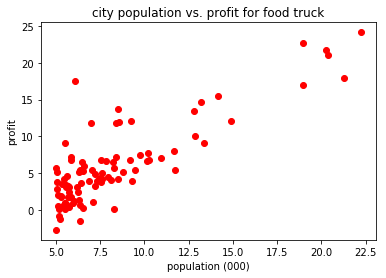

In [5]:
plot(x,y,'ro')
title('city population vs. profit for food truck')
xlabel('population (000)')
ylabel('profit')
show()

To map the data to something we can use for prediction, we want to come up with a linear function to describe this data.  We call this function the __hypothesis__:

<center>$h(x) = \theta^T x = \theta_0 + \theta_1 x_1$,</center>

where the vector $\theta$ comprises the coefficients of $h(x)$.  The primary task of linear regression is to calculate these coefficients by examining the data.


In [6]:
# given theta and x, calculate a linear hypothesis for y.
# theta is a 2 x 1 row vector and x is a 2 x m matrix
# the hypothesis h_\theta(x) is a m x 1 row vector
def hypothesis(theta, x):
    return dot(theta, x.T)

We can start by guessing a value for $\theta$, calculating $h(x)$, and then comparing the result with the real value $y$.  We compare these two values for each data point using the __sum of squared errors__: $\sum^m_{i=1}(h_{\theta}(x^i)-y^i)^2$ where $i$ is the index of the datapoint.



In [7]:
# expand x to have a bias multiplier of 1 for 
# each data point (this is multiplied by theta_0, the bias term
x = vstack((ones((m), dtype=float64), x)).T

# initial guess for theta is all 1s.  It could be anything.
theta = np.array([[1.0,1.0]])

We put the calculation of the sum of squared errors into a fuction of $\theta$ called the __cost function__:

<center>$J(\theta) = \frac{1}{2m}\sum^m_{i=1}(h_{\theta}(x^i)-y^i)^2$.</center>

In [8]:
def J(theta, x, y, m):
    return (1.0/float(2*m)*sum((hypothesis(theta, x) - y)**2))

J(theta,x,y,m)

10.266520491383504

With $\theta$ set to all ones, the squared error cost is around 5.13.  we can plot the line on the data to see how well they line up:

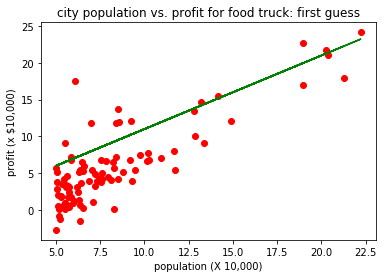

In [14]:
x1 = x[:,1]
f = list(map(lambda x: hypothesis(theta, x), x))
plot(x1,y,'ro')
plot(x1,f, 'g')
title('city population vs. profit for food truck: first guess')
xlabel('population (X 10,000)')
ylabel('profit (x $10,000)')
show()

Our first guess isn't so good, but here we can possibly see the key insight to linear regression. When we have a well-fitting line, the error distance between the line and the known y values is minimized.  We can minimize the cost function result to acheive this.  And the cost function can be minimized using a gradient of the cost function.

For the one-dimensional system in our example, the gradient is given by:

<center>$\Delta J_j = \frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j$</center>



In [16]:
def grad_J(theta, x, y, m):
    h = hypothesis(theta, x)
    return (1.0/float(m))*dot((h - y),x)

grad_J(theta, x, y, m)
#sum((h - y)*x[:,1])
#dot((h - y),x)

array([[  3.32066495,  24.23489308]])

now we can iterate to a new value of $\theta$ by subtracting a fraction of the gradient from the previous guess for $\theta$.  

<center>$\theta_{j+1} := \theta_j - \alpha\frac{1}{m}\sum^m_{i-1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j$</center>

In this way we can follow the curve of the cost function as the vector $\theta$ changes.  We should converge on the $\theta$ value that minimizes the cost function.  The parameter $\alpha$ is a multiplier that controls the size of the change to theta.  

In [17]:
def update_theta(alpha, theta, x, y, m):
    return theta - alpha*grad_J(theta, x, y, m)

update_theta(0.01,theta,x,y,m)

array([[ 0.96679335,  0.75765107]])

Now we can plot the linear function produced by the new theta value and see the difference.

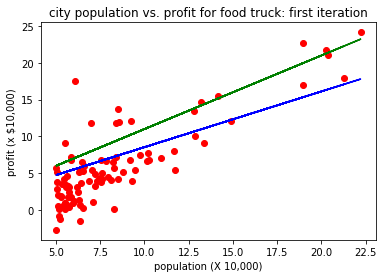

In [20]:
x1 = x[:,1]
f = list(map(lambda x: hypothesis(theta, x), x))
theta_new = update_theta(0.01,theta,x,y,m)
f_new = list(map(lambda x: hypothesis(theta_new, x), x))
plot(x1,y,'ro')
plot(x1,f, 'g')
plot(x1,f_new, 'b')
title('city population vs. profit for food truck: first iteration')
xlabel('population (X 10,000)')
ylabel('profit (x $10,000)')
show()

And the new cost is:

In [22]:
J(theta_new, x, y, m)

6.739719084269546

In order to get a line that best estimates the data, we need to iterate through the above calculations until the line converges on the minimum squared error approximation.  

In [24]:
def linear_regression_solve(iterations, alpha, x, y, theta):
    m = y.size
    for i in range(iterations):
        theta = update_theta(alpha,theta,x,y,m)
        yield J(theta, x, y, m), theta
    
iterations = 1500
alpha = 0.01
results = [j for j in linear_regression_solve(iterations, alpha, x, y, theta)]

For each iteration we record the cost value calculation and then graph it when we reach the end of our iterations.

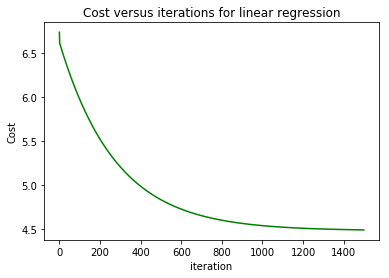

In [25]:
[J_history, thetas] = map(list, zip(*results))
plot([i for i in range(iterations)], J_history, 'g')
title('Cost versus iterations for linear regression')
xlabel('iteration')
ylabel('Cost')
show()

Now we can plot the final linear approximation by getting the last $\theta$ produced in the iteration step and plotting it on the data.

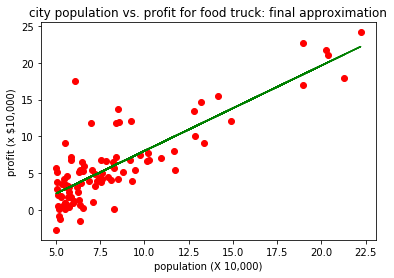

In [29]:
x1 = x[:,1]
t = thetas[-1]
f = list(map(lambda x: hypothesis(t, x), x))
plot(x1,y,'ro')
plot(x1,f, 'g')
title('city population vs. profit for food truck: final approximation')
xlabel('population (X 10,000)')
ylabel('profit (x $10,000)')
show()

We can now use the new linear function to predict profits in cities that are not in our data set: $h_\theta(x) = \theta^Tx$, where $x = [1.0, population]$.

So if we wanted to know the expected profit in a city with 1,000,000 people, the answer would be:

In [30]:
hypothesis(t, array([[1, 1000000]]))

array([[ 1160384.16310498]])

The simple, contrived example above tells us that we could expect to make over $1,000,000 in a city of 1 million people.  Of course, there may be other factors influencing profit and there are probably a number of other potentially nonlinear relationships that we would have to take into account to have a 'better' rediction.  This simple example should convey the idea of a linear regression in one dimension.

## Linear Regression in Muliple Variables

To understand multidimensional linear regression, let's look at another example.  Think about how one might go about trying to predict the selling price of a house.  What we would like to do is use some properties of the house to determine the price.  A linear regression approach would use the properties of actual sold houses to predict the selling prices of other houses.

The first task is to try to come up with some properties to use. we will use two properties:  __the square ft.  floor space__ of the house, __the number of rooms__.  There are many other features we can use, but these features can illustrate how multiple features can be used to get predictions.

In [31]:
a = np.loadtxt('ex1data2.txt', delimiter=',')
x = a[:, 0:2]
y = a[:,2]
x[0:10,:]

array([[  2.10400000e+03,   3.00000000e+00],
       [  1.60000000e+03,   3.00000000e+00],
       [  2.40000000e+03,   3.00000000e+00],
       [  1.41600000e+03,   2.00000000e+00],
       [  3.00000000e+03,   4.00000000e+00],
       [  1.98500000e+03,   4.00000000e+00],
       [  1.53400000e+03,   3.00000000e+00],
       [  1.42700000e+03,   3.00000000e+00],
       [  1.38000000e+03,   3.00000000e+00],
       [  1.49400000e+03,   3.00000000e+00]])

The first important task to perform on this data is to __normalize__ the values so that these columns have a similar range of values (the ranges should be within an order of magnitude).  If we don't normalize the data,  then the columns with the greatest values will dominate the calculation of the linear regression.  Normalization lets each column have a similar influence on the result.

We can normalize by subtracting by the mean of each column and then scale the result by dividing by the standard deviation.

In [32]:
mu = mean(x,axis=0)
sd = std(x,axis=0)

x_norm = (x-mu)/sd
x_norm[0:10,:]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517],
       [-0.01994505,  1.10220517],
       [-0.59358852, -0.22609337],
       [-0.72968575, -0.22609337],
       [-0.78946678, -0.22609337],
       [-0.64446599, -0.22609337]])

we also need to add the bias 'feature' to the x matrix as the zero element:

In [33]:
m = y.size
X = hstack((ones((m,1), dtype=float64),x_norm))
theta = zeros((1,X.shape[1]),dtype=float64)
iterations = 400
results = [j for j in linear_regression_solve(iterations, alpha, X, y, theta)]

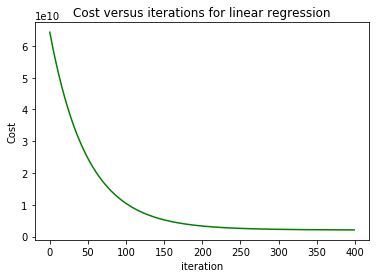

In [34]:
[J_history, thetas] = map(list, zip(*results))
plot([i for i in range(iterations)], J_history, 'g')
title('Cost versus iterations for linear regression')
xlabel('iteration')
ylabel('Cost')
show()

In [35]:
thetas[-1]

array([[ 334302.06399328,   99411.44947359,    3267.01285407]])

before running the hypothesis on a new house, we need to get the data points and scale them just as we did the training set:

In [36]:
house = hstack((ones((1),dtype=float64),(array([1650.0, 3.0]) - mu)/sd))
hypothesis(thetas[-1], house)

array([ 289221.54737122])

So a house with three rooms and 1650 square feet would be expected to cost $289,221 according to our model.

## Selecting the Learning Rate $\alpha$

The learning rate $\alpha$ controls the speed of convergence of the batch gradient algorithm.  for some values of $\alpha$, the algorithm wwon't converge at all.  We can experiment with possible values and see the effect on convergence.

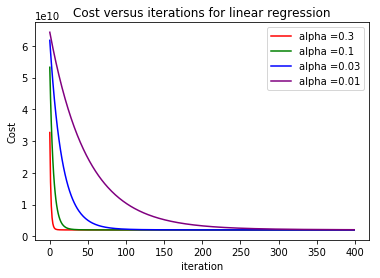

In [37]:
alphas = [0.3,0.1,0.03,0.01]
c = ['r','g','b','purple']
iterations = 400
k = 0
for a in alphas:
    results = [j for j in linear_regression_solve(iterations, a, X, y, theta)]
    [J_history, thetas] = map(list, zip(*results))
    plot([i for i in range(iterations)], J_history, '%s' %c[k])
    k += 1
title('Cost versus iterations for linear regression')
xlabel('iteration')
ylabel('Cost')
legend_text = 'alpha ='
legend(('%s%s' %(legend_text,alphas[0]),'%s%s' %(legend_text,alphas[1]),
        '%s%s' %(legend_text,alphas[2]),'%s%s' %(legend_text,alphas[3])),loc='best')
show()

## Normal Equations

There is an analytical solution for linear regression that solves for the linear function exactly. The analytical solution uses the so-called Normal Equations.  This is sometimes preferred though with a large number of parameters it can be very inefficient since the analytical solution requires a matrix inversion.  Matrix inversion can be a slow operation if the matrix is large.

The normal equation solution for linear regression solves for $\theta$ directly using the equation:

<center>$\theta = (X^TX)^{-1}X^T\vec{y}$</center>

Note that no feature scaling is needed with the analytic solution.

In [38]:
m = y.size
X = hstack((ones((m,1), dtype=float64),x))
theta = zeros((1,X.shape[1]),dtype=float64)
theta = dot(dot(pinv(dot(X.T,X)),X.T),y)
theta

array([ 89597.90954355,    139.21067402,  -8738.01911255])

Then we can see if the test house has the same predicted cost (it's not exactly the same because the solutions have some numerical differences due to the computer's capacity when working with floating point numbers).

In [39]:
house = hstack((ones((1),dtype=float64),(array([1650.0, 3.0]))))
hypothesis(theta, house)

293081.46433497168

## Other Types of Regression

here weve explored how to learn linear parameters for prediction.  often we have data that better fits polynomial, logarithmic and other types of functions.  These can be accomodated by adding 'features' to the $X$ matrix.  for example, suppose I have a single data point in the $X$ matrix (plus the bias term of course).  I might want to use a quadratic function to estimate my hypothesis.  Then I would want my hypothesis $h_\theta(x)$ to be quadratic.  

<center>$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_1^2$</center>

we can set $x_2 = x_1^2$ and then we have the regular linear hypothesis

<center>$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$</center>

When we train the regression to get the $\theta$ values, we pre-calculate the X_2 values according to the above assignment, then we can use the same method for training as outlined in the previous sections.